[View in Colaboratory](https://colab.research.google.com/github/diazero/cs230_fashion/blob/master/proj_3NN.ipynb)

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [13]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from tensorflow.python.framework import ops
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical


In [21]:
os.listdir('./')
# os.remove("fashion-mnist_train.csv")
# os.remove("fashion-mnist_test.csv")


['datalab',
 '.forever',
 'fashion-mnist_test (1).csv',
 '.keras',
 'fashion-mnist_test (3).csv',
 'fashion-mnist_train (1).csv',
 '.nv',
 '.local',
 'fashion-mnist_test (2).csv',
 '.ipython',
 '.cache',
 '.rnd',
 '.config']

In [22]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv
User uploaded file "fashion-mnist_train.csv" with length 133047193 bytes
User uploaded file "fashion-mnist_test.csv" with length 22176691 bytes


In [23]:

df = pd.DataFrame(pd.read_csv('fashion-mnist_train.csv'))
df_test = pd.DataFrame(pd.read_csv('fashion-mnist_test.csv'))


In [24]:
TRAINING_SIZE = 60000

train_label = df.loc[:TRAINING_SIZE - 1, 'label']
train_label = to_categorical(train_label, num_classes=10)

train_img = df.iloc[:TRAINING_SIZE, 1:785]

test_label = df_test.loc[:, 'label']
test_label = to_categorical(test_label, num_classes=10)

test_img = df_test.iloc[:, 1:785]

In [25]:
print("Fashion MNIST:")
print("Training set (images) shape: {shape}".format(shape=train_img.shape))
print("Training set (labels) shape: {shape}".format(shape=train_label.shape))
print("Test set (images) shape: {shape}".format(shape=test_img.shape))
print("Test set (labels) shape: {shape}".format(shape=test_label.shape))


Fashion MNIST:
Training set (images) shape: (60000, 784)
Training set (labels) shape: (60000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [26]:
# Dictionary of labels
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


y = 8 (Bag)


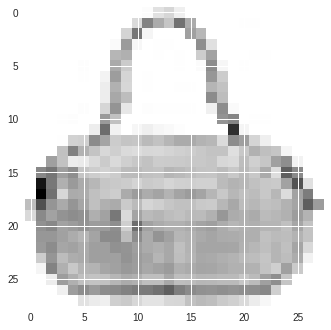

y = 2 (Pullover)


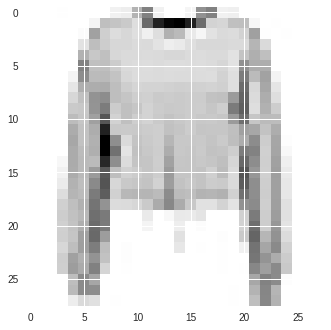

In [27]:
# Get random images and associated label
type(train_img)
sample_1 = (train_img.iloc[20]).values.reshape(28,28)
sample_label_1 = np.where(train_label[20] == 1)[0][0]

sample_2 = (test_img.iloc[50]).values.reshape(28,28)
sample_label_2 = np.where(test_label[50] == 1)[0][0]

# Show images and labels
print("y = {label_index} ({label})".format(label_index=sample_label_1, label=label_dict[sample_label_1]))
plt.imshow(sample_1, cmap='Greys')
plt.show()

print("y = {label_index} ({label})".format(label_index=sample_label_2, label=label_dict[sample_label_2]))
plt.imshow(sample_2, cmap='Greys')
plt.show()

In [28]:
# Network parameters
n_hidden_1 = 128 # Units in first hidden layer
n_hidden_2 = 128 # Units in second hidden layer
n_input = 784 # Fashion MNIST data input (img shape: 28*28)
n_classes = 10 # Fashion MNIST total classes (0-9 digits)
n_samples = TRAINING_SIZE

In [29]:
# Create placeholders
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (28*28 = 784)
    n_y -- scalar, number of classes (from 0 to 9, so -> 10)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    """
    
    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")
    
    return X, Y

In [30]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [n_hidden_1, n_input]
                        b1 : [n_hidden_1, 1]
                        W2 : [n_hidden_2, n_hidden_1]
                        b2 : [n_hidden_2, 1]
                        W3 : [n_classes, n_hidden_2]
                        b3 : [n_classes, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    # Set random seed for reproducibility
    tf.set_random_seed(42)
    
    # Initialize weights and biases for each layer
    W1 = tf.get_variable("W1", [n_hidden_1, n_input], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b1 = tf.get_variable("b1", [n_hidden_1, 1], initializer=tf.zeros_initializer())
    
    W2 = tf.get_variable("W2", [n_hidden_2, n_hidden_1], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b2 = tf.get_variable("b2", [n_hidden_2, 1], initializer=tf.zeros_initializer())
    
    W3 = tf.get_variable("W3", [n_classes, n_hidden_2], initializer=tf.contrib.layers.xavier_initializer(seed=42))
    b3 = tf.get_variable("b3", [n_classes, 1], initializer=tf.zeros_initializer())

    # Store initializations as a dictionary of parameters
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    
    return parameters

In [31]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve parameters from dictionary
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    # Carry out forward propagation      # Numpy equivalents:
    Z1 = tf.add(tf.matmul(W1,X), b1)     # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                  # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1), b2)    # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                  # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2), b3)    # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [32]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (10, number_of_examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # Get logits (predictions) and labels
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    # Compute cost
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

    return cost

In [33]:
def next_batch(num, data, labels):

    '''
    Return a total of `num` random samples and labels. 
    '''
    
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = data.iloc[idx]
    labels_shuffle = labels[idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [42]:
def model(train_img,train_label, test_img,test_label, learning_rate=0.0001, num_epochs=10, minibatch_size=64, print_cost=True, model_filename = 'fashion_mnist_3NN',graph_filename='costs'):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    train -- training set
    test -- test set
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every epoch
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    # Ensure that model can be rerun without overwriting tf variables
    ops.reset_default_graph()
    # Get input and output shapes
    (m,n_x) = train_img.shape
    n_y = train_label.shape[1]
    
    train_costs = []
    test_costs = []
    train_accuracy = []
    test_accuracy = []

    
    # Create placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)
    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation
    Z3 = forward_propagation(X, parameters)
    # Cost function
    cost = compute_cost(Z3, Y)
    # Backpropagation (using Adam optimizer)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    # Initialize variables
    init = tf.global_variables_initializer()
    
    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()
    


    # Start session to compute Tensorflow graph
    with tf.Session() as sess:
        
        # Run initialization
        sess.run(init)
        
        # Create a summary operation
        summary_writer = tf.summary.FileWriter('./Output', sess.graph)
        
        # Calculate correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        # Training loop
        for epoch in range(num_epochs):
            
            train_cost = 0.
            num_minibatches = int(m / minibatch_size)
            
            for i in range(num_minibatches):
                
                merge = tf.summary.merge_all()

                # Get next batch of training data and labels
                minibatch_X, minibatch_Y = next_batch(minibatch_size,train_img,train_label)
                
                # Execute optimizer and cost function
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X.T, Y: minibatch_Y.T})


                # Update epoch cost
                train_cost += minibatch_cost / num_minibatches
            
            
            # Print the cost every epoch
            if print_cost == True:
                
                
                test_cost = sess.run(cost, feed_dict={X: np.asarray(test_img).T, Y: np.asarray(test_label).T})
                train_acc = accuracy.eval({X: train_img.transpose(), Y: train_label.transpose()})
                test_acc = accuracy.eval({X: test_img.transpose(), Y: test_label.transpose()})
                
                print("Train Cost after epoch {epoch_num}: {cost}".format(epoch_num=epoch, cost=train_cost))
                print ("Train Accuracy:", train_acc)
                
                print("Test Cost after epoch {epoch_num}: {cost}".format(epoch_num=epoch, cost=test_cost))
                print ("Test Accuracy:", test_acc)
                
                train_costs.append(train_cost)
                test_costs.append(test_cost)
                train_accuracy.append(train_acc)
                test_accuracy.append(test_acc)
        
        # Plot costs
        plt.figure(figsize=(16,5))
        plt.plot(np.squeeze(train_costs), color='#2A688B')
        plt.xlim(0, num_epochs-1)
        plt.ylabel("cost")
        plt.xlabel("iterations")
        plt.title("learning rate = {rate}".format(rate=learning_rate))
        plt.savefig(graph_filename, dpi=300)
        plt.show()
        

        
        # Save parameters
        parameters = sess.run(parameters)
        print("Parameters have been trained!")
        
        save_path = saver.save(sess, './'+model_filename)

        # Calculate correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
        # Calculate accuracy on test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print ("Train Accuracy:", accuracy.eval({X: train_img.transpose(), Y: train_label.transpose()}))
        print ("Test Accuracy:", accuracy.eval({X: test_img.transpose(), Y: test_label.transpose()}))
        
        return parameters, train_costs, test_costs, train_accuracy,test_accuracy

Train Cost after epoch 0: 3.84513202062
('Train Accuracy:', 0.77916664)
Test Cost after epoch 0: 1.08145451546
('Test Accuracy:', 0.7792)
Train Cost after epoch 1: 0.811079645329
('Train Accuracy:', 0.79396665)
Test Cost after epoch 1: 0.729257404804
('Test Accuracy:', 0.7892)
Train Cost after epoch 2: 0.602895416995
('Train Accuracy:', 0.81881666)
Test Cost after epoch 2: 0.633449316025
('Test Accuracy:', 0.8095)
Train Cost after epoch 3: 0.54004533379
('Train Accuracy:', 0.81875)
Test Cost after epoch 3: 0.591041386127
('Test Accuracy:', 0.8021)
Train Cost after epoch 4: 0.496772283758
('Train Accuracy:', 0.82405)
Test Cost after epoch 4: 0.626243531704
('Test Accuracy:', 0.8156)
Train Cost after epoch 5: 0.487622114501
('Train Accuracy:', 0.84178334)
Test Cost after epoch 5: 0.49752548337
('Test Accuracy:', 0.8318)
Train Cost after epoch 6: 0.463843983164
('Train Accuracy:', 0.8484)
Test Cost after epoch 6: 0.519699633121
('Test Accuracy:', 0.83)
Train Cost after epoch 7: 0.45729598

Train Cost after epoch 37: 0.270763822957
('Train Accuracy:', 0.9055667)
Test Cost after epoch 37: 0.395598053932
('Test Accuracy:', 0.875)
Train Cost after epoch 38: 0.270221727921
('Train Accuracy:', 0.90648335)
Test Cost after epoch 38: 0.386398106813
('Test Accuracy:', 0.8799)
Train Cost after epoch 39: 0.275557427302
('Train Accuracy:', 0.9044333)
Test Cost after epoch 39: 0.389237165451
('Test Accuracy:', 0.8762)
Train Cost after epoch 40: 0.259714918106
('Train Accuracy:', 0.8987833)
Test Cost after epoch 40: 0.414405465126
('Test Accuracy:', 0.869)
Train Cost after epoch 41: 0.262933594313
('Train Accuracy:', 0.9008667)
Test Cost after epoch 41: 0.388653159142
('Test Accuracy:', 0.8749)
Train Cost after epoch 42: 0.266603646675
('Train Accuracy:', 0.9020333)
Test Cost after epoch 42: 0.405139744282
('Test Accuracy:', 0.8708)
Train Cost after epoch 43: 0.260392488099
('Train Accuracy:', 0.9000667)
Test Cost after epoch 43: 0.409793615341
('Test Accuracy:', 0.8727)
Train Cost aft

Train Cost after epoch 74: 0.218019011901
('Train Accuracy:', 0.9140667)
Test Cost after epoch 74: 0.514205873013
('Test Accuracy:', 0.8799)
Train Cost after epoch 75: 0.215288184202
('Train Accuracy:', 0.91265)
Test Cost after epoch 75: 0.526700079441
('Test Accuracy:', 0.8726)
Train Cost after epoch 76: 0.222343132522
('Train Accuracy:', 0.91798335)
Test Cost after epoch 76: 0.513841807842
('Test Accuracy:', 0.8749)
Train Cost after epoch 77: 0.217757365043
('Train Accuracy:', 0.9210167)
Test Cost after epoch 77: 0.499110639095
('Test Accuracy:', 0.8801)
Train Cost after epoch 78: 0.215599425888
('Train Accuracy:', 0.92415)
Test Cost after epoch 78: 0.54644972086
('Test Accuracy:', 0.8783)
Train Cost after epoch 79: 0.209522114214
('Train Accuracy:', 0.92006665)
Test Cost after epoch 79: 0.550597965717
('Test Accuracy:', 0.8798)
Train Cost after epoch 80: 0.213590616501
('Train Accuracy:', 0.9119833)
Test Cost after epoch 80: 0.55558180809
('Test Accuracy:', 0.8726)
Train Cost after 

Train Cost after epoch 111: 0.200835892034
('Train Accuracy:', 0.9187667)
Test Cost after epoch 111: 0.664164066315
('Test Accuracy:', 0.8728)
Train Cost after epoch 112: 0.19374105341
('Train Accuracy:', 0.9298667)
Test Cost after epoch 112: 0.594567358494
('Test Accuracy:', 0.8788)
Train Cost after epoch 113: 0.190343378996
('Train Accuracy:', 0.92761666)
Test Cost after epoch 113: 0.640381455421
('Test Accuracy:', 0.8798)
Train Cost after epoch 114: 0.194664034277
('Train Accuracy:', 0.9228)
Test Cost after epoch 114: 0.618986189365
('Test Accuracy:', 0.8777)
Train Cost after epoch 115: 0.198377285017
('Train Accuracy:', 0.9289167)
Test Cost after epoch 115: 0.660676956177
('Test Accuracy:', 0.879)
Train Cost after epoch 116: 0.190615432045
('Train Accuracy:', 0.9324)
Test Cost after epoch 116: 0.621344506741
('Test Accuracy:', 0.8787)
Train Cost after epoch 117: 0.192978459149
('Train Accuracy:', 0.92665)
Test Cost after epoch 117: 0.629382491112
('Test Accuracy:', 0.8776)
Train Co

Train Cost after epoch 148: 0.179737634545
('Train Accuracy:', 0.93585)
Test Cost after epoch 148: 0.761580765247
('Test Accuracy:', 0.8808)
Train Cost after epoch 149: 0.17539768737
('Train Accuracy:', 0.9361333)
Test Cost after epoch 149: 0.741077899933
('Test Accuracy:', 0.88)
Train Cost after epoch 150: 0.189700922683
('Train Accuracy:', 0.92625)
Test Cost after epoch 150: 0.744506537914
('Test Accuracy:', 0.8726)
Train Cost after epoch 151: 0.180741508492
('Train Accuracy:', 0.93413335)
Test Cost after epoch 151: 0.786805689335
('Test Accuracy:', 0.8806)
Train Cost after epoch 152: 0.180155658528
('Train Accuracy:', 0.9316)
Test Cost after epoch 152: 0.646443486214
('Test Accuracy:', 0.8795)
Train Cost after epoch 153: 0.176244522867
('Train Accuracy:', 0.9362)
Test Cost after epoch 153: 0.768723428249
('Test Accuracy:', 0.8773)
Train Cost after epoch 154: 0.168697511394
('Train Accuracy:', 0.93553334)
Test Cost after epoch 154: 0.848841786385
('Test Accuracy:', 0.8788)
Train Cost

Train Cost after epoch 185: 0.183370642897
('Train Accuracy:', 0.93761665)
Test Cost after epoch 185: 0.82001465559
('Test Accuracy:', 0.8801)
Train Cost after epoch 186: 0.172969278767
('Train Accuracy:', 0.93795)
Test Cost after epoch 186: 0.871212124825
('Test Accuracy:', 0.8824)
Train Cost after epoch 187: 0.165183633246
('Train Accuracy:', 0.93756664)
Test Cost after epoch 187: 0.918926954269
('Test Accuracy:', 0.8829)
Train Cost after epoch 188: 0.171220119281
('Train Accuracy:', 0.9331333)
Test Cost after epoch 188: 0.959574580193
('Test Accuracy:', 0.8811)
Train Cost after epoch 189: 0.175221221015
('Train Accuracy:', 0.939)
Test Cost after epoch 189: 0.894520223141
('Test Accuracy:', 0.8819)
Train Cost after epoch 190: 0.164090241293
('Train Accuracy:', 0.9409)
Test Cost after epoch 190: 0.966490924358
('Test Accuracy:', 0.8826)
Train Cost after epoch 191: 0.164218682734
('Train Accuracy:', 0.9387)
Test Cost after epoch 191: 0.985907912254
('Test Accuracy:', 0.8803)
Train Cost

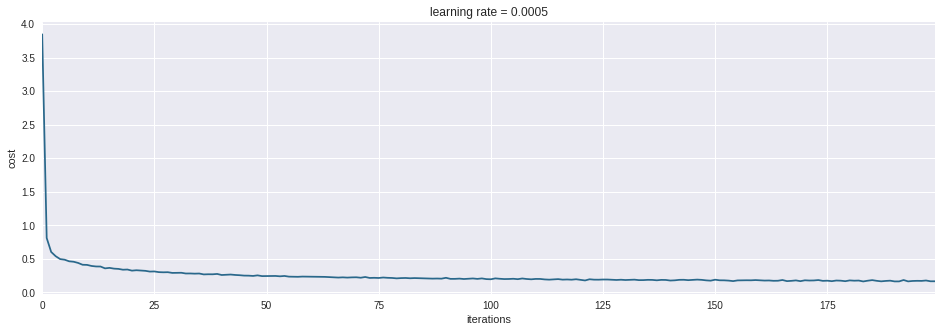

Parameters have been trained!
('Train Accuracy:', 0.93581665)
('Test Accuracy:', 0.8781)


In [43]:
#@title Default title text
# Running our model on Fashion MNIST
parameters, train_costs, test_costs, train_accuracy,test_accuracy = model(train_img,train_label, test_img, test_label,learning_rate=0.0005,num_epochs=200,model_filename='fashion_mnist_3NN.ckpt', graph_filename='fashion_mnist_costs.png')


In [44]:
os.listdir('./')

['datalab',
 '.forever',
 'fashion-mnist_train.csv',
 'fashion_mnist_3NN.ckpt.data-00000-of-00001',
 'fashion_mnist_costs.png',
 'fashion-mnist_test.csv',
 'fashion-mnist_test (1).csv',
 '.keras',
 'fashion-mnist_test (3).csv',
 'fashion-mnist_train (1).csv',
 '.nv',
 'fashion_mnist_3NN.ckpt.meta',
 '.local',
 'fashion_mnist_3NN.ckpt.index',
 'fashion-mnist_test (2).csv',
 '.ipython',
 '.cache',
 '.rnd',
 '.config',
 'Output',
 'checkpoint']

In [45]:
model_filename='fashion_mnist_3NN.ckpt'
graph_filename='fashion_mnist_costs.png'

In [46]:
files.download(graph_filename)
files.download(model_filename+'.data-00000-of-00001')
files.download(model_filename+'.meta')
files.download(model_filename+'.index')

In [47]:
import csv
with open('proj_3NN.csv', 'wb') as csvfile:
	writer = csv.writer(csvfile)
	writer.writerow(['train_costs', 'test_costs', 'train_accuracy','test_accuracy'])
	writer.writerows(zip(train_costs, test_costs, train_accuracy,test_accuracy))


In [49]:
files.download('proj_3NN.csv')


In [151]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('fashion_mnist_3NN.ckpt.meta')
    saver.restore(sess, "fashion_mnist_3NN.ckpt")

INFO:tensorflow:Restoring parameters from fashion_mnist_3NN.ckpt
